II. Programming [9v] 
                           
 Consider the diabetes.arff data available at the homework tab, comprising 8 biological features to 
classify 768 patients into 2 classes (normal, diabetes).

In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt

1)  [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a 
single input variable. Using f_classif from sklearn, identify the input variables with the 
worst and best discriminative power. Plot their class-conditional probability density 
functions.

Variable with the best discriminative power: Glucose:213.16175217803828
Variable with the worst discriminative power: BloodPressure:3.256950397889028


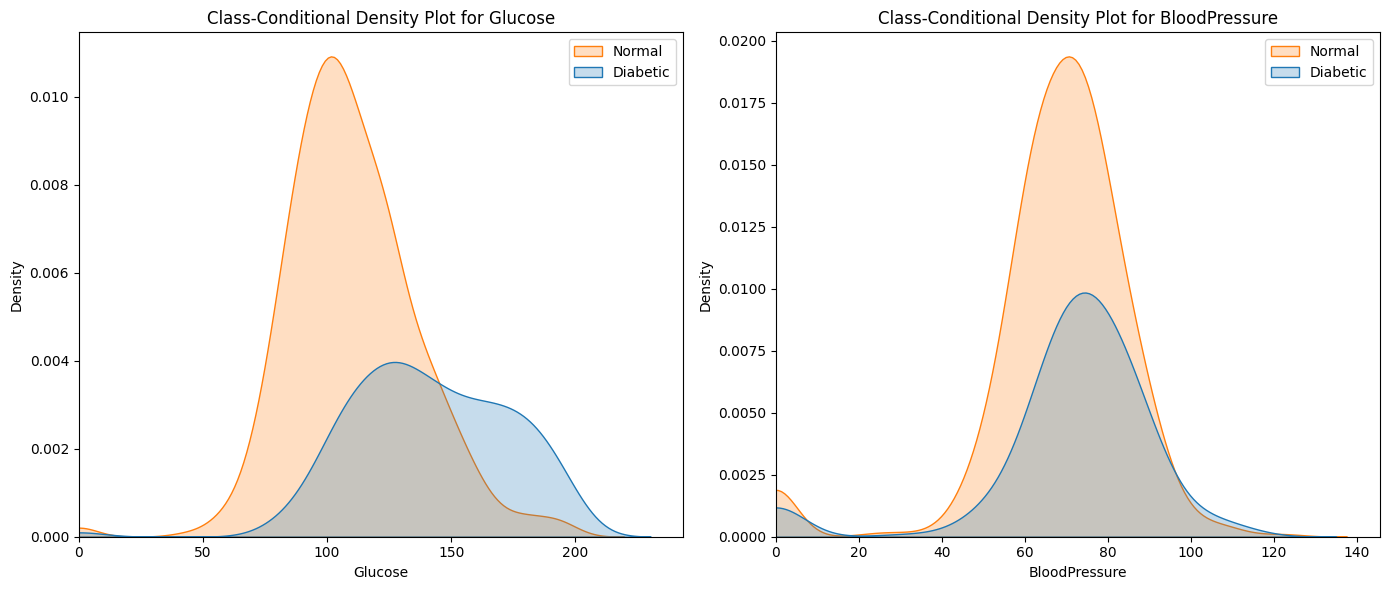

In [23]:
data = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')
x = df.drop('Outcome', axis=1)
y = df['Outcome']

fimportance, p_value = f_classif(x, y)

feature_scores = sorted(zip(x.columns, fimportance), key=lambda x: x[1], reverse=True)
best_feature = feature_scores[0][0]
worst_feature = feature_scores[-1][0]
print(f"Variable with the best discriminative power: {best_feature}:{feature_scores[0][1]}")
print(f"Variable with the worst discriminative power: {worst_feature}:{feature_scores[-1][1]}")

plt.figure(figsize=(14, 6))

# Plot for the best feature
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_feature, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Density Plot for {best_feature}')
plt.xlim(left=0)
plt.legend(title='', labels=["Normal", "Diabetic"])
# Plot for the worst feature
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_feature, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Density Plot for {worst_feature}')
plt.xlim(left=0)
plt.legend(title='', labels=["Normal", "Diabetic"])

plt.tight_layout()

2)  [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1), 
assess in a single plot both the training and testing accuracies of a decision tree with minimum 
sample split in {2,5,10,20,30,50,100} and the remaining parameters as default.  
[optional] Note that split thresholding of numeric variables in decision trees is non-
deterministic in sklearn, hence you may opt to average the results using 10 runs per 
parameterization.

Train accuracies:  [1.0, 0.9723127035830619, 0.9397394136807817, 0.8843648208469055, 0.8485342019543974, 0.8403908794788274, 0.7850162866449512] 
Test accuracies:  [0.6948051948051948, 0.6948051948051948, 0.6883116883116883, 0.7337662337662337, 0.7662337662337663, 0.7597402597402597, 0.7467532467532467]


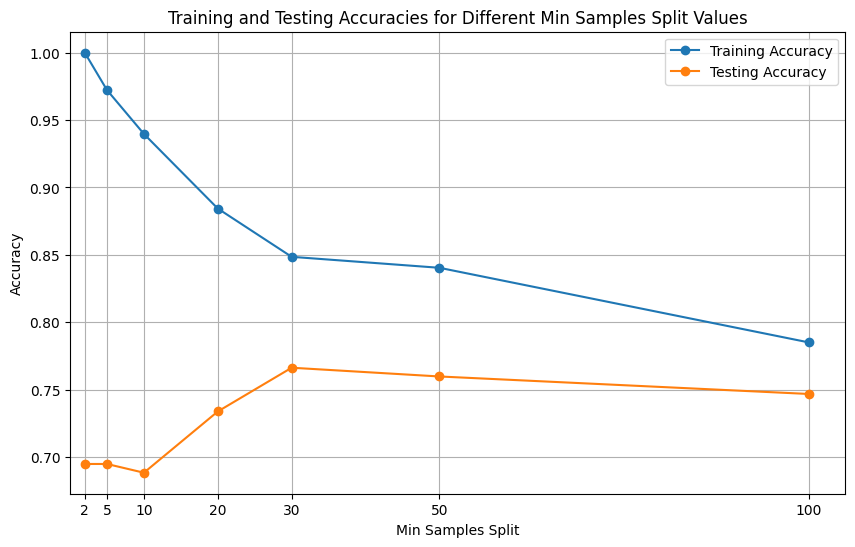

In [33]:
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

train_accuracies = []
test_accuracies = []

min_samples_splits = [2, 5, 10, 20, 30, 50, 100]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

for min_samples_split in min_samples_splits:
    classifier = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=1)
    classifier.fit(x_train, y_train)

    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)

    train_accuracies.append(metrics.accuracy_score(y_train_pred, y_train))
    test_accuracies.append(metrics.accuracy_score(y_test_pred, y_test))

print("Train accuracies: ", train_accuracies, "\nTest accuracies: ", test_accuracies)
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy', marker='o') 
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies for Different Min Samples Split Values')
plt.grid(True)
plt.legend()
plt.xticks(min_samples_splits)
plt.xlim(left=0)
plt.show()


3) [2v] Critically analyze these results, including the generalization capacity across settings. 

4) [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree 
(random_state=1) using all available data and ensuring that the maximum depth would be 3 
in order to avoid overfitting risks.

    *i.* Plot the decision tree. 
    
    *ii.* Explain what characterizes diabetes by identifying the conditional associations 
together with their posterior probabilities.